In [121]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [122]:
##Generating the Syntetic data for The logistic Regression model
X_train  = np.random.sample((100,5))
y_train = np.random.randint(2,size = (100,))

In [123]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in X_train are:
 [[0.80074457 0.96826158 0.31342418 0.69232262 0.87638915]
 [0.89460666 0.08504421 0.03905478 0.16983042 0.8781425 ]
 [0.09834683 0.42110763 0.95788953 0.53316528 0.69187711]
 [0.31551563 0.68650093 0.83462567 0.01828828 0.75014431]
 [0.98886109 0.74816565 0.28044399 0.78927933 0.10322601]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 [0 1 0 0 0]
Type of y_train: <class 'numpy.ndarray'>


In [124]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 5)
The shape of y_train is: (100,)
We have m = 100 training examples


In [126]:
## adding bais to the random data to create some predictive power to the data
X_train[y_train == 1, :] = X_train[y_train == 1, :] - 0.5
X_train[y_train == 0, :] = X_train[y_train == 0, :] + 0.2

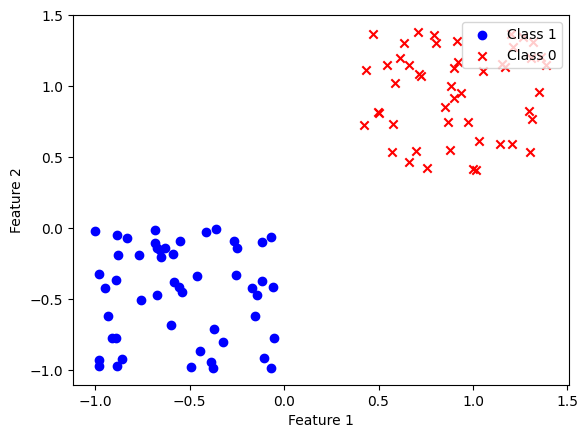

In [127]:
##some plotting before model building

def plot_data(x1, x2, labels, pos_label, neg_label):
    # Scatter plot for positive and negative examples
    plt.scatter(x1[labels == 1], x2[labels == 1], marker='o', color='b', label=pos_label)
    plt.scatter(x1[labels == 0], x2[labels == 0], marker='x', color='r', label=neg_label)

# Plot examples
plot_data(X_train[:, 0], X_train[:, 1], labels=y_train, pos_label="Class 1", neg_label="Class 0")

# Set the y-axis label
plt.ylabel('Feature 2')
# Set the x-axis label
plt.xlabel('Feature 1')
plt.legend(loc="upper right")
plt.show()

In [129]:
##I am not taking care of Broadcasting Here so if using this code ensure the spapes of you date match the one i used
## eg X should be[ m,n] and y should be[ m,]
## all implemetations are done in fully vectorized format
## the sigmoid function used in logistic regression to make the outut between 0 and 1
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [130]:
##cost Funcion
def compute_cost(X, y, w, b):
  m = X.shape[0]
  f_wb = sigmoid(np.dot(X,w) + b)
  cost = -y*np.log(f_wb) - (1-y)*np.log(1-f_wb)
  return np.sum(cost)/m

In [131]:
##test code to check if cost function works properly
m, n = X_train.shape
# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [132]:
##Gradient function for logistic regression
def compute_gradient(X, y, w, b, lambda_=None):
  m, n = X.shape
  f_wb = sigmoid(np.dot(X, w) + b)
  err = f_wb - y
  d_w = np.dot(X.T, err)/m
  d_b = np.sum(err)/m
  return  d_b,d_w

In [134]:
##performing logistic Regression using this function
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
  w = copy.deepcopy(w_in)
  b = b_in
  J_history = []
  p_history = []
  for i in range(num_iters):
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    if i < 100000:
      cost = cost_function(X, y, w, b)
      J_history.append(cost)
      p_history.append([w,b])
      if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            p_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

  return w, b, J_history, p_history #return w and J,w history for graphing

In [135]:
#  Doing gradient descent on systetic data
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.69   
Iteration 1000: Cost     0.35   
Iteration 2000: Cost     0.23   
Iteration 3000: Cost     0.17   
Iteration 4000: Cost     0.13   
Iteration 5000: Cost     0.11   
Iteration 6000: Cost     0.09   
Iteration 7000: Cost     0.08   
Iteration 8000: Cost     0.07   
Iteration 9000: Cost     0.07   
Iteration 9999: Cost     0.06   


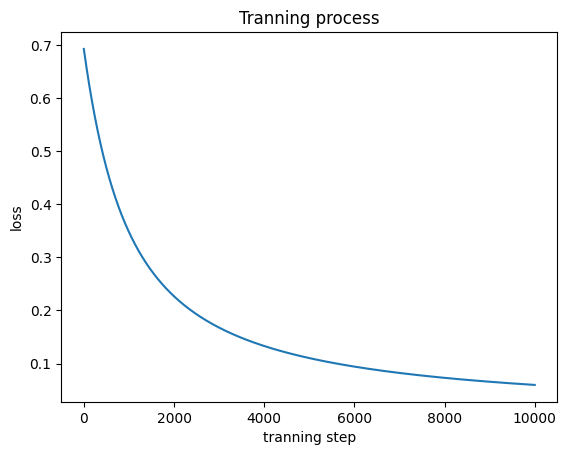

In [136]:
##visualize the tranning process
plt.plot(J_history)
plt.xlabel("tranning step")
plt.ylabel("loss")
plt.title("Tranning process")
plt.show()

In [137]:
def predict(X, w, b):
  p = sigmoid(np.dot(X,w)+b)
  return (p > 0.5).astype(int)

In [138]:
# lets check the prediction function
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0 1 1 1]


In [139]:
#Check how the trained model performs on the data used tpo trained it in terms of accuracy
p = predict(X_train, w,b)
p = np.int16(p)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 100.000000


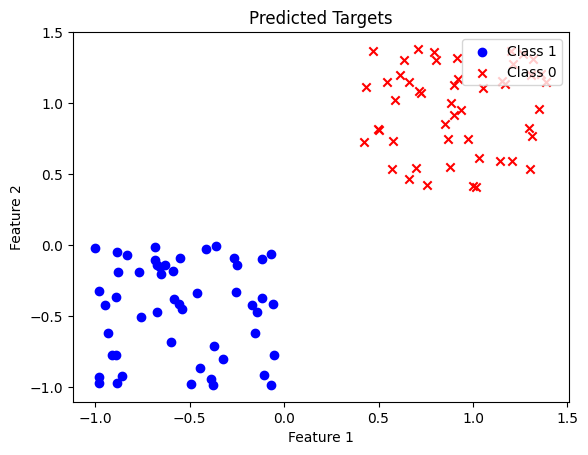

In [141]:
##ploting the predicted values
plot_data(X_train[:, 0], X_train[:, 1], labels=p, pos_label="Class 1", neg_label="Class 0")

# Set the y-axis label
plt.ylabel('Feature 2')
# Set the x-axis label
plt.xlabel('Feature 1')
plt.title("Predicted Targets")
plt.legend(loc="upper right")
plt.show()

In [142]:
#lets make some polynomial features out of the one we have using Sklearn
from sklearn import preprocessing
pf = preprocessing.PolynomialFeatures(
    degree=2,
 interaction_only=False,
 include_bias=False
)
poly_feats = pf.fit_transform(X_train)
poly_feats.shape

(100, 20)

In [143]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", poly_feats[0])

X_train[0]: [1.20074457 1.36826158 0.71342418 1.09232262 1.27638915]
mapped X_train[0]: [1.20074457 1.36826158 0.71342418 1.09232262 1.27638915 1.44178752
 1.64293266 0.85664021 1.31160045 1.53261734 1.87213974 0.97615089
 1.49458306 1.74643423 0.50897406 0.77928936 0.91060688 1.1931687
 1.39422874 1.62916927]


In [144]:
## the models just Trainned can overfit the Data so we can use Regularization in the cost and other functions used in gradient descent
## Regularized cost Fucnction
def compute_cost_reg(X, y, w, b, lambda_ = 1):
  m = X.shape[0]
  f_wb = sigmoid(np.dot(X,w)+ b)
  cost = -y *np.log(f_wb) - (1-y)*np.log(1-f_wb)
  return np.sum(cost)/m + (lambda_*np.sum(w**2))/(2*m)

In [145]:
##testing the  Regularized cost Fucnction
initial_w = np.random.rand(poly_feats.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(poly_feats, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.5839208509202831


In [146]:
## Regularized gradient  Fucnction
def compute_gradient_reg(X, y, w, b, lambda_=1):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    error = f_wb - y
    d_w = (np.dot(X.T, error) + lambda_ * w) / m
    d_b = np.sum(error) / m
    return d_b, d_w

In [147]:
##testing the  Regularized gradient  Fucnction
itial_w  = np.random.rand(poly_feats.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(poly_feats, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.13377637980744742
First few elements of regularized dj_dw:
 [0.31907019265253456, 0.3358125631615281, 0.3250282395859074, 0.31405041240595827]


In [148]:
# Doing Gradient Desent using the Regularized functions
## doing this on the polynomial features
## this is the case when the Regularization  is necessary as in the case fo lost of features model is prone to overfit
X_mapped = poly_feats
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.31   
Iteration 1000: Cost     0.07   
Iteration 2000: Cost     0.06   
Iteration 3000: Cost     0.05   
Iteration 4000: Cost     0.05   
Iteration 5000: Cost     0.06   
Iteration 6000: Cost     0.06   
Iteration 7000: Cost     0.06   
Iteration 8000: Cost     0.06   
Iteration 9000: Cost     0.06   
Iteration 9999: Cost     0.06   


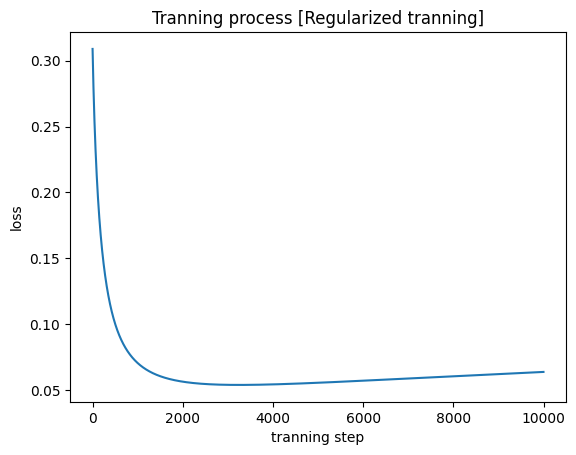

In [149]:
##visualize the tranning process
plt.plot(J_history)
plt.xlabel("tranning step")
plt.ylabel("loss")
plt.title("Tranning process [Regularized tranning]")
plt.show()

In [150]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 100.000000


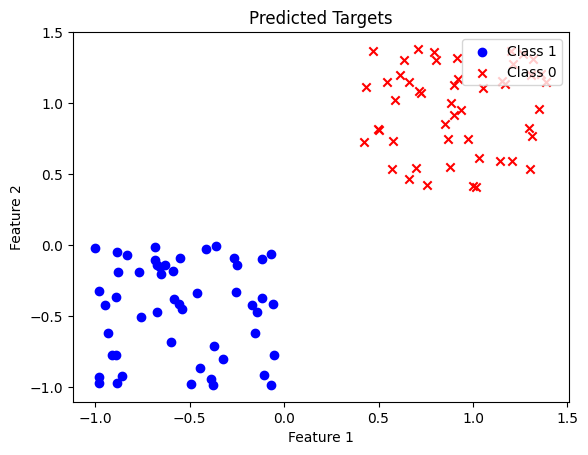

In [151]:
##ploting the predicted values

plot_data(X_mapped[:, 0], X_mapped[:, 1], labels=p, pos_label="Class 1", neg_label="Class 0")

# Set the y-axis label
plt.ylabel('Feature 2')
# Set the x-axis label
plt.xlabel('Feature 1')
plt.title("Predicted Targets")
plt.legend(loc="upper right")
plt.show()

In [152]:
##gettion the accuracy of 100 is not possible in real senarios it is hapening here because the data is small
## the accuracy will drop on unseen data in real case